In [1]:
import capacity_planning as cp
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

## US Datasets

### '02-CPlan_US6.xlsx'

[**************************************************] 100%

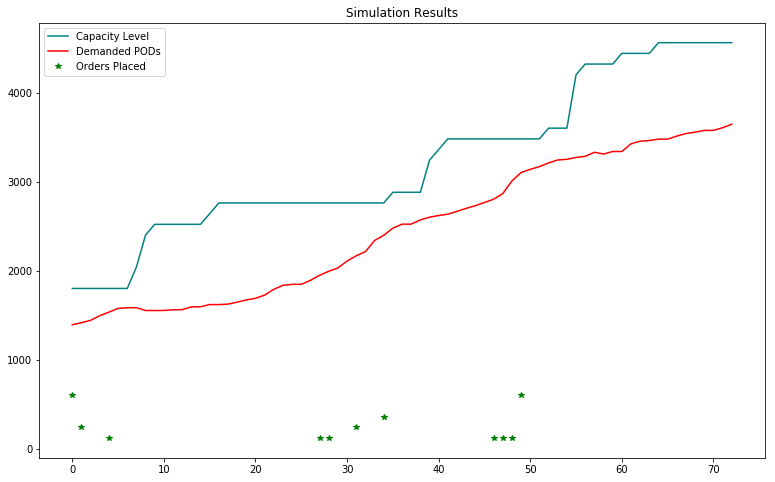

Simulation Parameters:
Demand Instances Simulated = 1000
Planning Horizon = 15 weeks
Starting Capacity = 1800 (demand 20 weeks from most recent observation)
Train-Test Split = 0.30 - 0.70

Output Statistics:
Avg Utilization = 0.761
StdDev Utilization = 0.092
Average Order Frequency (racks): 0.32
Maximum Order Size (racks): 5
# of Weeks where Demand not met: 0
Capacity Buffer Used = 100



In [2]:
# Set the random seed for reproducibility
np.random.seed(12345) # change or remove this line for new results

# Read in the data we want to use
filename = '02-CPlan_US6.xlsx'
df = pd.read_excel(filename, parse_dates=['Date_A'], index_col = 'Date_A')
ts = df['End_alloc'].dropna()

alpha = 0.3
split = round(len(ts)*alpha) # define the training/test split

train = ts.iloc[0:split].values
test = ts.iloc[split:].values
init_cap = train[-1] - train[-1]%120 + 120*4 # Initialize capacity to be the demand 20F weeks ahead of the training split (to the nearest raack)
numsims = 1000 # Specify the number of iterations at each order level, trade-off of speed vs accuracy
target_csl= 0.99
window = 1
buffer_met = 0.99
minbuffer = 100
p_ub = 6
refit = 10

cap_plan = cp.CapacityPlanning(train = train, 
                               test = test,
                               init_cap = init_cap,
                               numsims = numsims,
                               target_csl = target_csl,
                               window = window,
                               buffer_met = buffer_met,
                               minbuffer = minbuffer,
                               p_ub = p_ub,
                               refit = refit
                              )

cap_plan.simulate()
cap_plan.summary(plot=True)

### '01-CPlan_US2.xlsx'

[**************************************************] 100%

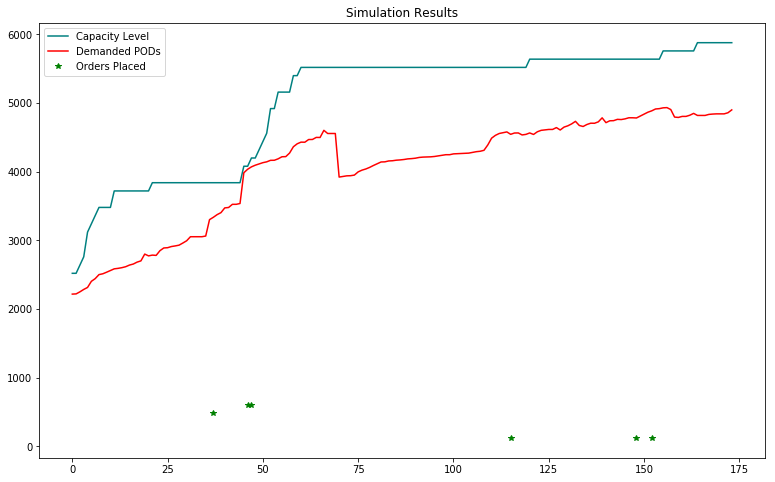

Simulation Parameters:
Demand Instances Simulated = 100
Planning Horizon = 15 weeks
Starting Capacity = 2520 (demand 20 weeks from most recent observation)
Train-Test Split = 0.20 - 0.80

Output Statistics:
Avg Utilization = 0.806
StdDev Utilization = 0.059
Average Order Frequency (racks): 0.10
Maximum Order Size (racks): 5
# of Weeks where Demand not met: 0
Capacity Buffer Used = 100



In [15]:
# Set the random seed for reproducibility
np.random.seed(12345) # change or remove this line for new results

# Read in the data we want to use
filename = '01-CPlan_US2.xlsx'
df = pd.read_excel(filename, parse_dates=['Date_A'], index_col = 'Date_A')
ts = df['End_alloc'].dropna()

alpha = 0.2
split = round(len(ts)*alpha) # define the training/test split

train = ts.iloc[0:split].values
test = ts.iloc[split:].values
init_cap = train[-1] - train[-1]%120 + 120*3  # Initialize capacity to be the demand 20F weeks ahead of the training split (to the nearest raack)
numsims = 100 # Specify the number of iterations at each order level, trade-off of speed vs accuracy
target_csl= 0.99
window = 1
buffer_met = 0.95
refit = 10

cap_plan = cp.CapacityPlanning(train = train, 
                               test = test,
                               init_cap = init_cap,
                               numsims = numsims,
                               target_csl = target_csl,
                               window = window,
                               buffer_met = buffer_met,
                               refit = refit
                              )
cap_plan.simulate()
cap_plan.summary(plot=True)

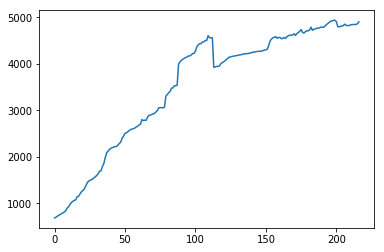

<Figure size 936x576 with 0 Axes>

In [16]:
plt.plot(ts.values)
plt.figure(figsize = (13,8))
plt.show()

## EM Datasets

### '03-CPlan_EM2.xlsx'

[**************************************************] 100%

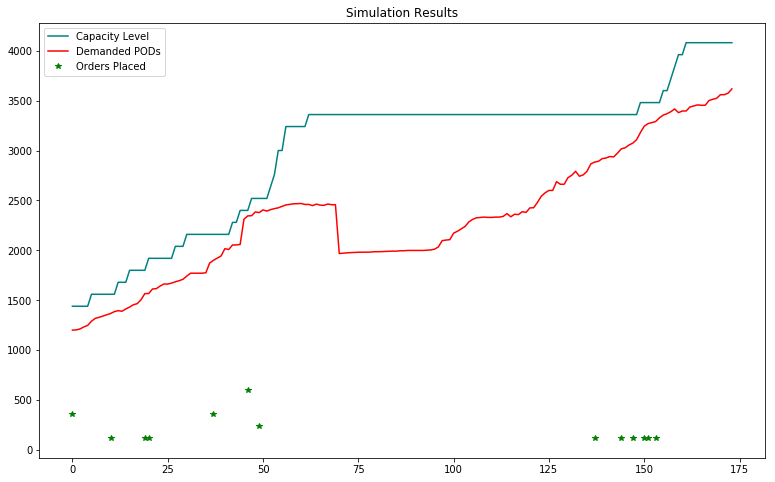

Simulation Parameters:
Demand Instances Simulated = 500
Planning Horizon = 15 weeks
Starting Capacity = 1440 (demand 20 weeks from most recent observation)
Train-Test Split = 0.20 - 0.80

Output Statistics:
Avg Utilization = 0.785
StdDev Utilization = 0.113
Average Order Frequency (racks): 0.13
Maximum Order Size (racks): 5
# of Weeks where Demand not met: 0
Capacity Buffer Used = 240



In [10]:
# Set the random seed for reproducibility
np.random.seed(12345) # change or remove this line for new results

# Read in the data we want to use
filename = '03-CPlan_EM2.xlsx'
df = pd.read_excel(filename, parse_dates=['Date_A'], index_col = 'Date_A')
ts = df['End_alloc'].dropna()

alpha = 0.2
split = round(len(ts)*alpha) # define the training/test split

train = ts.iloc[0:split].values
test = ts.iloc[split:].values
init_cap = train[-1] - train[-1]%120 + 120*3  # Initialize capacity to be the demand 20F weeks ahead of the training split (to the nearest raack)
numsims = 500 # Specify the number of iterations at each order level, trade-off of speed vs accuracy
target_csl= 0.99
window = 1
minbuffer = 240
refit = 10
cap_plan = cp.CapacityPlanning(train = train, 
                               test = test,
                               init_cap = init_cap,
                               numsims = numsims,
                               target_csl = target_csl,
                               window = window,
                               minbuffer = minbuffer,
                               refit = refit
                              )
cap_plan.simulate()
cap_plan.summary(plot=True)

### '04-CPlan_EM3.xlsx'

[**************************************************] 99%

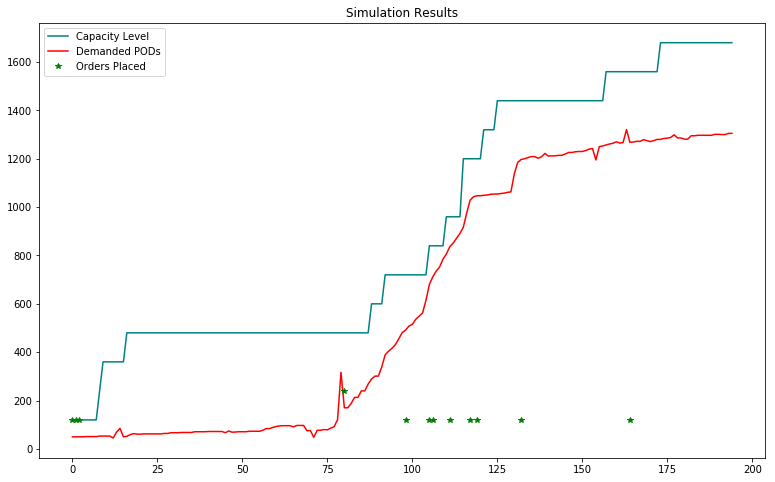

Simulation Parameters:
Demand Instances Simulated = 1000
Planning Horizon = 15 weeks
Starting Capacity = 120 (demand 20 weeks from most recent observation)
Train-Test Split = 0.10 - 0.90

Output Statistics:
Avg Utilization = 0.529
StdDev Utilization = 0.305
Average Order Frequency (racks): 0.07
Maximum Order Size (racks): 2
# of Weeks where Demand not met: 0
Capacity Buffer Used = 400



In [11]:
# Set the random seed for reproducibility
np.random.seed(12345) # change or remove this line for new results

# Read in the data we want to use
filename = '04-CPlan_EM3.xlsx'
df = pd.read_excel(filename, parse_dates=['Date_A'], index_col = 'Date_A')
ts = df['End_alloc'].dropna()

alpha = 0.1
split = round(len(ts)*alpha) # define the training/test split

train = ts.iloc[0:split].values
test = ts.iloc[split:].values
init_cap = train[-1] - train[-1]%120 + 120 
numsims = 1000 # Specify the number of iterations at each order level, trade-off of speed vs accuracy
target_csl= 0.99
window = 1
max_racks = 2
minbuffer = 400
refit = 10
buffer_met = 0.99
range_ = 15
refit = 3

cap_plan = cp.CapacityPlanning(train = train, 
                               test = test,
                               init_cap = init_cap,
                               numsims = numsims,
                               target_csl = target_csl,
                               window = window,
                               buffer_met = buffer_met,
                               max_racks = max_racks,
                               minbuffer = minbuffer,
                               refit = refit,
                               range_ = range_
                              )
cap_plan.simulate()
cap_plan.summary(plot=True)

# AP Datasets

### '05-CPlan_AP1.xlsx'

[**************************************************] 100%

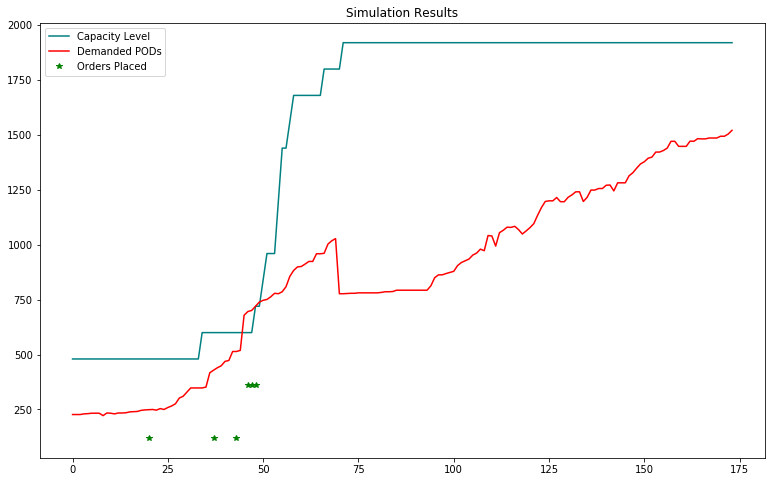

Simulation Parameters:
Demand Instances Simulated = 500
Planning Horizon = 15 weeks
Starting Capacity = 480 (demand 20 weeks from most recent observation)
Train-Test Split = 0.20 - 0.80

Output Statistics:
Avg Utilization = 0.598
StdDev Utilization = 0.144
Average Order Frequency (racks): 0.07
Maximum Order Size (racks): 3
# of Weeks where Demand not met: 4
Capacity Buffer Used = 250



In [13]:
# Set the random seed for reproducibility
np.random.seed(12345) # change or remove this line for new results

# Read in the data we want to use
filename = '05-CPlan_AP1.xlsx'
df = pd.read_excel(filename, parse_dates=['Date_A'], index_col = 'Date_A')
ts = df['End_alloc'].dropna()

alpha = 0.2
split = round(len(ts)*alpha) # define the training/test split

train = ts.iloc[0:split].values
test = ts.iloc[split:].values
init_cap = train[-1] - train[-1]%120 + 120*3 # Initialize capacity to be the demand 20F weeks ahead of the training split (to the nearest raack)
numsims = 500 # Specify the number of iterations at each order level, trade-off of speed vs accuracy
target_csl= 0.99
range_ = 15
window = 1 #2 looked good
minbuffer = 250
buffer_met = 0.97
refit = 10
cap_plan = cp.CapacityPlanning(train = train, 
                               test = test,
                               init_cap = init_cap,
                               numsims = numsims,
                               target_csl = target_csl,
                               window = window,
                               buffer_met = buffer_met,
                               range_ = range_,
                               minbuffer = minbuffer,
                               max_racks = 3,
                               refit = refit
                              )
cap_plan.simulate()
cap_plan.summary(plot=True)

### '07-CPlan_AP2.xlsx'

In [7]:
# Set the random seed for reproducibility
np.random.seed(12345) # change or remove this line for new results

# Read in the data we want to use
filename = '07-CPlan_AP2.xlsx'
df = pd.read_excel(filename, parse_dates=['Date_A'], index_col = 'Date_A')
ts = df['End_alloc'].dropna()

alpha = 0.2
split = round(len(ts)*alpha) # define the training/test split

train = ts.iloc[0:split].values
test = ts.iloc[split:].values
init_cap = train[-1] - train[-1]%120 + 120  # Initialize capacity to be the demand 20F weeks ahead of the training split (to the nearest raack)
numsims = 1000 # Specify the number of iterations at each order level, trade-off of speed vs accuracy
target_csl= 0.99
window = 1
buffer_met = 0.9

cap_plan = cp.CapacityPlanning(train = train, 
                               test = test,
                               init_cap = init_cap,
                               numsims = numsims,
                               target_csl = target_csl,
                               window = window,
                               buffer_met = buffer_met
                              )
cap_plan.simulate()
cap_plan.summary(plot=True)

[*****                                             ] 10%

KeyboardInterrupt: 

### '08-CPlan_AP4 .xlsx'

In [ ]:
# Set the random seed for reproducibility
np.random.seed(12345) # change or remove this line for new results

# Read in the data we want to use
filename = '08-CPlan_AP4 .xlsx'
df = pd.read_excel(filename, parse_dates=['Date_A'], index_col = 'Date_A')
ts = df['End_alloc'].dropna()

alpha = 0.1
split = round(len(ts)*alpha) # define the training/test split

train = ts.iloc[0:split].values
test = ts.iloc[split:].values
init_cap = ts.iloc[split+30] # Initialize capacity to be the demand 20F weeks ahead of the training split (to the nearest raack)
numsims = 1000 # Specify the number of iterations at each order level, trade-off of speed vs accuracy
target_csl= 0.99
window = 1
max_racks = 2
buffer_met = 0.9
minbuffer = 0 #(racks)
range_ = 15
refit = 10

cap_plan = cp.CapacityPlanning(train = train, 
                               test = test,
                               init_cap = init_cap,
                               numsims = numsims,
                               target_csl = target_csl,
                               window = window,
                               buffer_met = buffer_met,
                               range_ = range_,
                               max_racks = max_racks,
                               refit = refit
                              )

cap_plan.simulate()
cap_plan.summary(plot=True)

# Example for making an order reccommendation for actual use

In [ ]:
# If there are back orders in the system, account for them...
prev_orders = [1, 5, 6, 5, 14, 15, 15, 8, 8, 8, 8] # here each number n represents an order that was placed n weeks ago

# build an orderlist to feed into the capacity planning model
backorderlist = cp.initialize_orderlist(prev_orders)

# Read in the data we want to use
filename = '02-CPlan_US6.xlsx'
df = pd.read_excel(filename, parse_dates=['Date_A'], index_col = 'Date_A')
ts = df['End_alloc'].dropna()


train = ts.values
test = []
numsims = 100 # Specify the number of iterations at each order level, trade-off of speed vs accuracy
target_csl= 0.99
window = 1
buffer_met = 0.99
minbuffer = 100
p_ub = 6
init_cap = train[-1] - train[-1]%120 + 120 # This should be the actual number of pods we have at this time

cap_plan = cp.CapacityPlanning(train = train, 
                               test = test,
                               numsims = numsims,
                               target_csl = target_csl,
                               window = window,
                               buffer_met = buffer_met,
                               minbuffer = minbuffer,
                               p_ub = p_ub,
                               orderlist = backorderlist,
                               init_cap = init_cap
                              )

cap_plan.MakeOrders(newdata = True, testing = True)
